# Data Wrangling<a id='2_Data_Wrangling'></a>

## 2.2 Introduction<a id='2.2_Introduction'></a>

Each year so many people in the state of Califonia lose their lives due to drug or alcohol related collisions. 1,066 people lost their lives in 2019, a slight decrease of 4.5% compared to 2018.
* Also, in 2019, per https://www.nhtsa.gov/,  50% of all drivers killed in motor vehicle crashes, who were tested, tested positive for legal and/ or illegal drugs, an increase of 8% from 2018.

This notebook focuses on collecting all data sources related to California car collisions, organizing it, and making sure it's well defined. This introduction will evolve as I learn more about the primary data source, put together by Alex Gude hosted on https://www.kaggle.com/alexgude/california-traffic-collision-data-from-switrs. 

### 2.2.1 Problem Statement<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

How to develop a data-driven user-friendly decision model system with the ultimate goal of reducing alcohol and drug impaired fatal collisions in the great state of Californai. 

## 2.3 Imports<a id='2.3_Imports'></a>

### Potential data to collect

* Death per mile
* arrest dataset to gauge the law enforcement preventive measures
* census Data
* unemployment rate data
* real estate prices

In [87]:
import pandas as pd
import os

In [88]:
# import df_shrink from fastai to shrink this large dataset
from fastai.tabular.core import df_shrink

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [60]:
from pandas_profiling import ProfileReport

In [61]:
# Importing the data system file:///Users/Moe/Desktop/Data%20Science%20Boot-Camp%20Material/OnlineArrestDispoData1980-2020.csv

## 2.4 Objective<a id='2.4_Objective'></a>

Develop a predictive model that provide a data-driven decision tool to; 
* assist California State police departments and Highway Patrols to allocate limited resources in the most optimized manner to prevent potential fatal Alcohol-Impaired or Drug-Impaired coillisions
* aid insurance companies to classify a potential policy holder's risk level in being involved in fatal or sever Alcohol-Impaired or Drug-Impaired coillisions
* an interactive map where the user can get a color coded map based on the level of DUI related collision for his/her route from origin to destination, per the time of the day, weather, age, car, and other factors

## 2.5 Load Collision Data<a id='2.5_Load_Collision_Data'></a>

### Create engine and make the connection

#### Explore Collision Table 

In [118]:
# fire up an engine to connect to switrs sqlite db
engine = create_engine('sqlite:///switrs.sqlite')

In [119]:
# defining a function for making queries
def query( Sql_query):
  with engine.connect() as con:
      rs = con.execute(Sql_query)
      df = pd.DataFrame(rs.fetchall())
      df.columns = rs.keys()
  return df;   

In [120]:
# show all columns in collision tabel
query("SELECT * FROM collisions LIMIT 5").columns

Index(['case_id', 'jurisdiction', 'officer_id', 'reporting_district',
       'chp_shift', 'population', 'county_city_location', 'special_condition',
       'beat_type', 'chp_beat_type', 'city_division_lapd', 'chp_beat_class',
       'beat_number', 'primary_road', 'secondary_road', 'distance',
       'direction', 'intersection', 'weather_1', 'weather_2',
       'state_highway_indicator', 'caltrans_county', 'caltrans_district',
       'state_route', 'route_suffix', 'postmile_prefix', 'postmile',
       'location_type', 'ramp_intersection', 'side_of_highway', 'tow_away',
       'collision_severity', 'killed_victims', 'injured_victims',
       'party_count', 'primary_collision_factor', 'pcf_violation_code',
       'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection',
       'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with',
       'pedestrian_action', 'road_surface', 'road_condition_1',
       'road_condition_2', 'lighting', 'control_device', 'chp_road_type

##### How many accidents with geographical location? (x,y coordinates)

In [125]:
query("SELECT * FROM collisions WHERE 'latittude' IS NOT NULL AND 'longtitude' IS NOT NULL")

#### Explore parties table

In [ ]:
# show all columns in parties tabel
query("SELECT * FROM parties LIMIT 5").columns

In [117]:
# show all columns in collision tabel
query("SELECT * FROM victims LIMIT 5").columns

Index(['id', 'case_id', 'party_number', 'victim_role', 'victim_sex',
       'victim_age', 'victim_degree_of_injury', 'victim_seating_position',
       'victim_safety_equipment_1', 'victim_safety_equipment_2',
       'victim_ejected'],
      dtype='object')

In [110]:
df_collision.shape

(5, 74)

In [80]:
# create engine and create connection to it
engine = create_engine('sqlite:///switrs.sqlite')
with engine.connect() as con:
    rs = con.execute("SELECT DISTINCT vehicle_make FROM parties")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
    rs2 = con.execute("SELECT party_race FROM parties WHERE vehicle_make ='FORD'")
    df2= pd.DataFrame(rs2.fetchall())
    df2.columns =rs2.keys()
    rs3 = con.execute("SELECT * FROM parties LIMIT 5")
    df3= pd.DataFrame(rs3.fetchall())
    df3.columns =rs3.keys()
    

In [ ]:
number_drunk_ford = 

In [81]:
#explore the columns in party table
df3.columns

Index(['id', 'case_id', 'party_number', 'party_type', 'at_fault', 'party_sex',
       'party_age', 'party_sobriety', 'party_drug_physical',
       'direction_of_travel', 'party_safety_equipment_1',
       'party_safety_equipment_2', 'financial_responsibility',
       'hazardous_materials', 'cellphone_use', 'school_bus_related',
       'oaf_violation_code', 'oaf_violation_category', 'oaf_violation_section',
       'oaf_violation_suffix', 'other_associate_factor_1',
       'other_associate_factor_2', 'party_number_killed',
       'party_number_injured', 'movement_preceding_collision', 'vehicle_year',
       'vehicle_make', 'statewide_vehicle_type', 'chp_vehicle_type_towing',
       'chp_vehicle_type_towed', 'party_race'],
      dtype='object')

In [ ]:
df.head(

In [82]:
with engine.connect() as con:
    rs4 = con.execute("SELECT party_type FROM parties WHERE at_fault IS NOT NULL")
    df4= pd.DataFrame(rs4.fetchall())
    df4.columns =rs4.keys()


<AxesSubplot:>

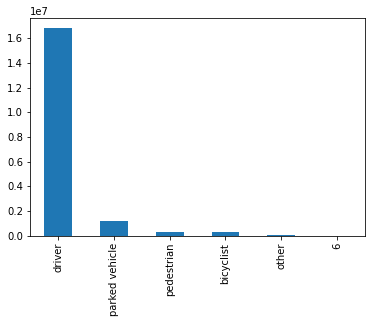

In [83]:
# visualize the distribution of parties 
df4['party_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

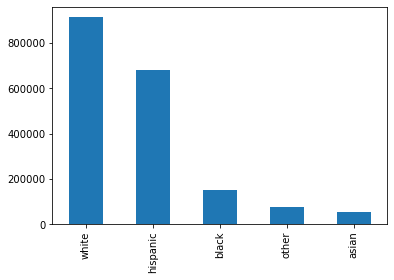

In [65]:
df2['party_race'].value_counts().plot(kind='bar')

In [84]:
con = engine.connect()
rs = con.execute("SELECT * FROM case_ids")
df = pd.DataFrame(rs.fetchall())

In [85]:
rs_2 = con.execute("SELECT * FROM parties ")

In [86]:
table_names = engine.table_names()
print(table_names)

['case_ids', 'collisions', 'parties', 'victims']


<ipython-input-86-8d744d47b078>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  table_names = engine.table_names()


#### Exploring victims table

In [ ]:
#### Explore Collision Table 
engine = create_engine('sqlite:///switrs.sqlite')
with engine.connect() as con:
    r_collision = con.execute("SELECT * FROM collisions LIMIT 5 ")
    collision_df = pd.DataFrame(r_collision.fetchall())
    collision_df.columns = r_collision.keys()
collision_df.head()